# This is a the Test Simulation for MWM Compact Binary Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
ver = 'beta-0'
cb_tab = Table.read('workspace/target_files/CB/{}/mwm_cb_3x1.csv'.format(ver))
cb_tab

ra,dec
float64,float64
2.184708333333333,-1.6707222222222207
359.61729166666663,-2.753277777777777
3.018791666666666,2.025000000000001
356.16895833333325,-0.20155555555555446
356.00758333333334,0.3546666666666678
0.6065833333333329,4.124805555555556
0.3768749999999996,5.10652777777778
2.8904583333333327,4.856222222222222
6.866375,-1.1407777777777768


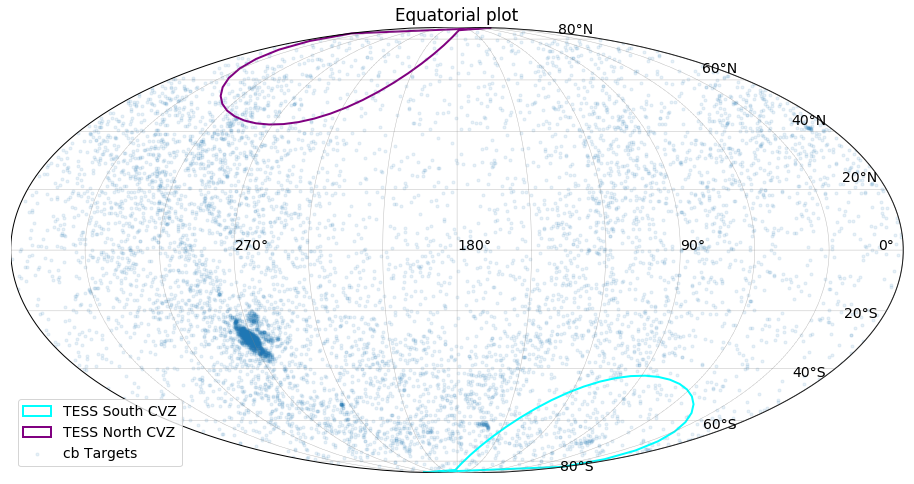

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot cb Targets
xcb,ycb = bmap(cb_tab['ra'],cb_tab['dec'])
bmap.scatter(xcb,ycb,marker='.',label='cb Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [4]:
target_tab = Table()

In [5]:
target_tab['ra'] = cb_tab['ra']
target_tab['dec'] = cb_tab['dec']
target_tab['cadence'] = np.repeat('mwm_cb_2x1',len(cb_tab['ra']))
target_tab['type'] = np.repeat('mwm_cb',len(cb_tab['ra']))
target_tab['priority'] = np.repeat(np.array(15,dtype='int32'),len(cb_tab['ra']))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(cb_tab['ra']))

In [6]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str10,str6,int32,float32
2.184708333333333,-1.6707222222222207,mwm_cb_2x1,mwm_cb,15,1.0
359.61729166666663,-2.753277777777777,mwm_cb_2x1,mwm_cb,15,1.0
3.018791666666666,2.025000000000001,mwm_cb_2x1,mwm_cb,15,1.0
356.16895833333325,-0.20155555555555446,mwm_cb_2x1,mwm_cb,15,1.0
356.00758333333334,0.3546666666666678,mwm_cb_2x1,mwm_cb,15,1.0
0.6065833333333329,4.124805555555556,mwm_cb_2x1,mwm_cb,15,1.0
0.3768749999999996,5.10652777777778,mwm_cb_2x1,mwm_cb,15,1.0
2.8904583333333327,4.856222222222222,mwm_cb_2x1,mwm_cb,15,1.0
6.866375,-1.1407777777777768,mwm_cb_2x1,mwm_cb,15,1.0


In [7]:
target_tab.write('{}/mwm_cb_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table
For this cadence the last delta is basically 1 day up to the end of the survey.

In [8]:
cadence_tab = Table()

In [9]:
cadence_tab['cadence'] = ['mwm_cb_2x1']
cadence_tab['nepochs'] = np.array([2],dtype='int32')
cadence_tab['delta'] = [np.array([0,180],dtype='float32')]
cadence_tab['delta_min'] = [np.array([0,1],dtype='float32')]
cadence_tab['delta_max'] = [np.array([0,3000],dtype='float32')]
cadence_tab['lunation'] = [np.repeat(np.array([0.35],dtype='float32'),2)]
cadence_tab['instrument'] = [np.repeat('boss',2)]

In [10]:
cadence_tab

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
str10,int32,float32,float32,float32,float32,str4
mwm_cb_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 3000.0,0.35 .. 0.35,boss .. boss


In [11]:
cadence_tab['delta'].data

array([[  0., 180.]], dtype=float32)

In [12]:
cadence_tab.write('{}/mwm_cb_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [13]:
test =  Table.read('{}/mwm_cb_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
bytes10,int32,float32,float32,float32,float32,bytes16
mwm_cb_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 3000.0,0.35 .. 0.35,boss .. boss
